In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.to_numeric(df.TotalCharges,errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull().sum()

11

In [9]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df1 = df[df.TotalCharges!=' ']

In [11]:
df1.shape

(7032, 21)

In [12]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Total charges are of object type. We have to convert it into numeric 

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\krris\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

customer id is an  unnecessary data. Hence we drop the column

In [24]:
df1.drop('customerID', axis = 1, inplace = True)

C:\Users\krris\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we are goi ng to do some visualizations to explore the data.

Text(0.5, 1.0, 'Customer churn prediction visualization')

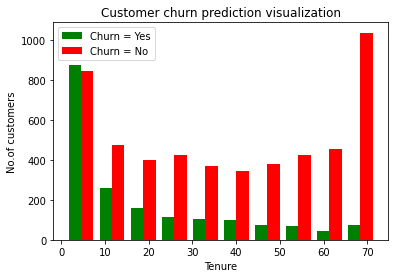

In [26]:
tenure_curn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes,tenure_curn_no], color = ['green','red'], label = ['Churn = Yes','Churn = No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No.of customers')
plt.title('Customer churn prediction visualization')

Text(0.5, 1.0, 'Customer churn prediction visualization')

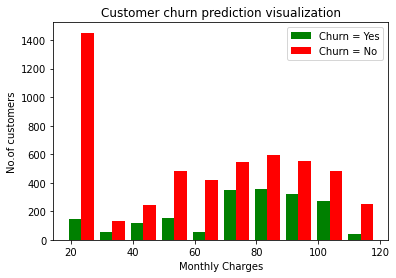

In [22]:
monthlycharges_curn_no = df1[df1.Churn == 'No'].MonthlyCharges
monthlycharges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([monthlycharges_churn_yes,monthlycharges_curn_no], color = ['green','red'], label = ['Churn = Yes','Churn = No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('No.of customers')
plt.title('Customer churn prediction visualization')

There are several columns with  yes or no vlaues. WE are using a for loop to find out the unique values in each column

In [30]:
def unique_values_in_cols(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

In [31]:
unique_values_in_cols(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


There are columns with values "no internet service", 'no phone service'. We have to convert this into "No"

In [34]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [35]:
unique_values_in_cols(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


We want to replace yes with 1 and no with 0.

In [54]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [55]:
for cols in yes_no_cols:
    df1[cols].replace({'Yes':1,"No":0}, inplace =True)

In [56]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [57]:
df1['gender'].replace({'Male':1,'Female':0},inplace =True)

C:\Users\krris\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
df1.gender.unique()

array([0, 1], dtype=int64)

The columns InternetService,Contract,PaymentMethod have more than 2 unique values. Therefore we use  one hot encoding .Here we use pandas get_dummies method.

In [59]:
df2 = pd.get_dummies(data= df1, columns =['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [52]:
df2.shape

(7032, 27)

In [60]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

'tenure','MonthlyCharges','TotalCharges'  columns have numweric values. so we want to scale it in the range of 0 and 1.

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [63]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
336,0,0,0,0,0.591549,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
6015,0,0,0,0,0.028169,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
537,0,0,1,1,0.450704,1,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
3876,1,0,0,0,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


Split the dataset into train data and test data

In [66]:
x = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 5)

In [68]:
x_train.shape

(5625, 26)

In [69]:
x_test.shape

(1407, 26)

Then we are applying tensorflow model to the dataset.

In [73]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


model.fit(x_train,y_train, epochs =100)


Epoch 1/100
176/176 [==============================] - 1s 894us/step - loss: 0.5306 - accuracy: 0.7065
Epoch 2/100
176/176 [==============================] - 0s 856us/step - loss: 0.4364 - accuracy: 0.7826
Epoch 3/100
176/176 [==============================] - 0s 838us/step - loss: 0.4224 - accuracy: 0.7977
Epoch 4/100
176/176 [==============================] - 0s 843us/step - loss: 0.4175 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 875us/step - loss: 0.4138 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 847us/step - loss: 0.4122 - accuracy: 0.8023
Epoch 7/100
176/176 [==============================] - 0s 859us/step - loss: 0.4100 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 0s 829us/step - loss: 0.4086 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 841us/step - loss: 0.4062 - accuracy: 0.8128
Epoch 10/100
176/176 [==============================] - 0s 832us/step - l

176/176 [==============================] - 0s 907us/step - loss: 0.3464 - accuracy: 0.8409
Epoch 81/100
176/176 [==============================] - 0s 832us/step - loss: 0.3457 - accuracy: 0.8384
Epoch 82/100
176/176 [==============================] - 0s 832us/step - loss: 0.3451 - accuracy: 0.8420
Epoch 83/100
176/176 [==============================] - 0s 942us/step - loss: 0.3463 - accuracy: 0.8398
Epoch 84/100
176/176 [==============================] - 0s 831us/step - loss: 0.3440 - accuracy: 0.8416
Epoch 85/100
176/176 [==============================] - 0s 836us/step - loss: 0.3437 - accuracy: 0.8411
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8446
Epoch 87/100
176/176 [==============================] - 0s 946us/step - loss: 0.3430 - accuracy: 0.8412
Epoch 88/100
176/176 [==============================] - 0s 932us/step - loss: 0.3428 - accuracy: 0.8441
Epoch 89/100
176/176 [==============================] - 0s 833us/step - loss: 0

In [75]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 796us/step - loss: 0.5064 - accuracy: 0.7711


[0.5063815712928772, 0.7711442708969116]

In [76]:
yp = model.predict(x_test)

In [77]:
yp[:5]

array([[0.50076103],
       [0.6212968 ],
       [0.01348147],
       [0.72030914],
       [0.5372134 ]], dtype=float32)

In [78]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [80]:
y_pred = []
for  element in yp:
    if element>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [81]:
y_pred[:5]

[1, 1, 0, 1, 1]

In [83]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [84]:
y_pred[:10]

[1, 1, 0, 1, 1, 1, 0, 0, 0, 1]

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.62      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

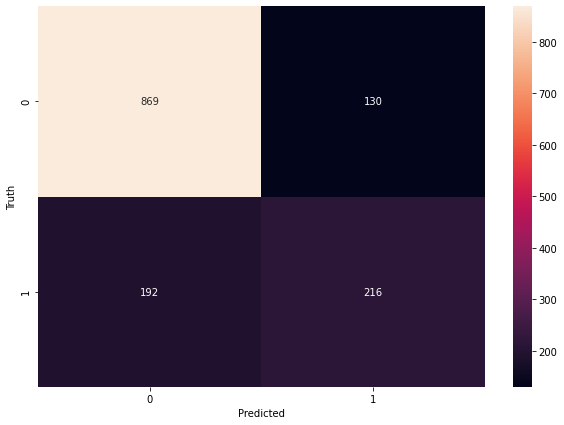

In [87]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')